In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

park = pd.read_excel('한강공원.xls', dtype = {'기간':str})

In [3]:
old_covid19 = pd.read_csv('코로나.csv',  encoding = 'CP949')

In [4]:
old_covid19['자치구 기준일']=old_covid19['자치구 기준일'].str.slice(start = 0,stop = 10)



In [5]:
old_covid19.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가,수집일
0,2021.09.05,1280.0,2.0,1260.0,16.0,2371.0,9.0,2365.0,21.0,2762.0,...,17.0,5976.0,46.0,4931.0,28.0,3099.0,19.0,6053.0,23.0,2021-09-05 19:11:41.0
1,2021.09.04,1278.0,6.0,1244.0,12.0,2362.0,12.0,2343.0,16.0,2738.0,...,27.0,5930.0,48.0,4904.0,35.0,3080.0,31.0,6029.0,23.0,2021-09-04 19:11:41.0
2,2021.09.03,1272.0,5.0,1232.0,12.0,2350.0,10.0,2327.0,13.0,2716.0,...,29.0,5882.0,38.0,4869.0,36.0,3049.0,24.0,6006.0,22.0,2021-09-03 19:11:41.0
3,2021.09.02,1267.0,6.0,1223.0,15.0,2340.0,8.0,2314.0,23.0,2698.0,...,20.0,5843.0,40.0,4832.0,41.0,3026.0,22.0,5985.0,24.0,2021-09-02 19:11:41.0
4,2021.09.01,1261.0,16.0,1213.0,16.0,2333.0,12.0,2291.0,16.0,2678.0,...,33.0,5806.0,72.0,4789.0,48.0,3005.0,30.0,5955.0,35.0,2021-09-01 19:11:41.0


In [6]:
old_covid19.columns

Index(['자치구 기준일', '종로구 전체', '종로구 추가', '중구 전체', '중구 추가', '용산구 전체', '용산구 추가',
       '성동구 전체', '성동구 추가', '광진구 전체', '광진구 추가', '동대문구 전체', '동대문구 추가', '중랑구 전체',
       '중랑구 추가', '성북구 전체', '성북구 추가', '강북구 전체', '강북구 추가', '도봉구 전체', '도봉구 추가',
       '노원구 전체', '노원구 추가', '은평구 전체', '은평구 추가', '서대문구 전체', '서대문구 추가', '마포구 전체',
       '마포구 추가', '양천구 전체', '양천구 추가', '강서구 전체', '강서구 추가', '구로구 전체', '구로구 추가',
       '금천구 전체', '금천구 추가', '영등포구 전체', '영등포구 추가', '동작구 전체', '동작구 추가', '관악구 전체',
       '관악구 추가', '서초구 전체', '서추구 추가', '강남구 전체', '강남구 추가', '송파구 전체', '송파구 추가',
       '강동구 전체', '강동구 추가', '기타 전체', '기타 추가', '수집일'],
      dtype='object')

In [7]:
#  한강 공원이 있는 지역구 칼럼 선택 
new_covid19 = old_covid19[['강동구 추가', '송파구 추가','광진구 추가','서추구 추가','용산구 추가','영등포구 추가','마포구 추가','강서구 추가']]
#위에 자치구 기준이를 적어도 된다.
new_covid19['자치구 기준일'] = old_covid19['자치구 기준일']

new_covid19.head()

,강동구 추가,송파구 추가,광진구 추가,서추구 추가,용산구 추가,영등포구 추가,마포구 추가,강서구 추가,자치구 기준일
0,19.0,28.0,24.0,17.0,9.0,21.0,12.0,27.0,2021.09.05
1,31.0,35.0,22.0,27.0,12.0,36.0,16.0,20.0,2021.09.04
2,24.0,36.0,18.0,29.0,10.0,33.0,17.0,16.0,2021.09.03
3,22.0,41.0,21.0,20.0,8.0,33.0,17.0,21.0,2021.09.02
4,30.0,48.0,20.0,33.0,12.0,32.0,14.0,27.0,2021.09.01


In [8]:
#2020년 1월 데이터가 없어 1월데이터를 추가
new_covid19 = new_covid19.append({'강동구 추가':0,'송파구 추가':0,'광진구 추가':0,'서추구 추가':0,'용산구 추가':0
                                 ,'영등포구 추가':0,'마포구 추가':0,'강서구 추가':0, '자치구 기준일':'2020.01.01'}, ignore_index=True)

#자치구 기준일을 년 월 일 별로 나누기
new_covid19[['year','month','date']] = new_covid19['자치구 기준일'].str.split('.',expand=True)


In [9]:
new_covid19

,강동구 추가,송파구 추가,광진구 추가,서추구 추가,용산구 추가,영등포구 추가,마포구 추가,강서구 추가,자치구 기준일,year,month,date
0,19.0,28.0,24.0,17.0,9.0,21.0,12.0,27.0,2021.09.05,2021,09,05
1,31.0,35.0,22.0,27.0,12.0,36.0,16.0,20.0,2021.09.04,2021,09,04
2,24.0,36.0,18.0,29.0,10.0,33.0,17.0,16.0,2021.09.03,2021,09,03
3,22.0,41.0,21.0,20.0,8.0,33.0,17.0,21.0,2021.09.02,2021,09,02
4,30.0,48.0,20.0,33.0,12.0,32.0,14.0,27.0,2021.09.01,2021,09,01
...,...,...,...,...,...,...,...,...,...,...,...,...
576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,20,None,None
577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,20,None,None
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,20,None,None
579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,20,None,None


In [10]:
# 지역별 월 추가 확진자수 합계
new_covid19 = new_covid19.groupby(['year','month']).sum()

In [11]:
new_covid19

강동구 추가  송파구 추가  광진구 추가  서추구 추가  용산구 추가  영등포구 추가  마포구 추가  강서구 추가
year month                                                                 
2020 01        0.0     0.0     0.0     0.0     0.0      0.0     0.0     0.0
     02        1.0     3.0     1.0     1.0     0.0      0.0     0.0     0.0
     03        6.0    13.0     4.0    20.0    12.0     18.0    14.0    20.0
     04        3.0    12.0     3.0    14.0     6.0      5.0     9.0     4.0
     05       11.0    11.0     6.0     4.0    20.0     11.0     3.0    19.0
     06       11.0     7.0     3.0    14.0    12.0     27.0    11.0    33.0
     07       14.0    44.0     5.0     7.0     4.0      9.0    14.0    25.0
     08       92.0   158.0    74.0    75.0    46.0     67.0    77.0   110.0
     09       43.0    80.0    33.0    57.0    22.0     52.0    32.0    72.0
     10       20.0    54.0    11.0    34.0    21.0     18.0    26.0    21.0
     11       69.0   212.0    39.0   233.0    81.0     82.0    98.0   291.0
     12      303.0   501.0   277.0   359.0   192.0    390.0   402.0   737.0
2021 01      183.0   252.0   125.0   142.0   106.0    194.0   159.0   216.0
     02      158.0   210.0   153.0   111.0   235.0    172.0   101.0    99.0
     03      249.0   191.0   253.0   158.0   131.0    127.0   101.0   125.0
     04      250.0   390.0   247.0   356.0   106.0    203.0   169.0   218.0
     05      324.0   448.0   219.0   282.0   173.0    263.0   174.0   199.0
     06      266.0   425.0   232.0   337.0   242.0    273.0   249.0   210.0
     07      518.0   832.0   466.0   769.0   480.0    650.0   648.0   565.0
     08      447.0   900.0   528.0   666.0   448.0    838.0   723.0   645.0
     09      126.0   188.0   105.0   126.0    51.0    155.0    76.0   111.0

In [12]:
new_covid19.columns
new_covid19.rename(columns={'강동구 추가' : '강동구',
                           '송파구 추가':'송파구',
                           '광진구 추가':'광진구',
                           '서추구 추가':'서초구',
                           '용산구 추가':'용산구',
                           '영등포구 추가':'영등포구',
                           '마포구 추가':'마포구',
                           '강서구 추가':'강서구'}, inplace=True)

In [13]:
new_covid19

강동구    송파구    광진구    서초구    용산구   영등포구    마포구    강서구
year month                                                        
2020 01       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
     02       1.0    3.0    1.0    1.0    0.0    0.0    0.0    0.0
     03       6.0   13.0    4.0   20.0   12.0   18.0   14.0   20.0
     04       3.0   12.0    3.0   14.0    6.0    5.0    9.0    4.0
     05      11.0   11.0    6.0    4.0   20.0   11.0    3.0   19.0
     06      11.0    7.0    3.0   14.0   12.0   27.0   11.0   33.0
     07      14.0   44.0    5.0    7.0    4.0    9.0   14.0   25.0
     08      92.0  158.0   74.0   75.0   46.0   67.0   77.0  110.0
     09      43.0   80.0   33.0   57.0   22.0   52.0   32.0   72.0
     10      20.0   54.0   11.0   34.0   21.0   18.0   26.0   21.0
     11      69.0  212.0   39.0  233.0   81.0   82.0   98.0  291.0
     12     303.0  501.0  277.0  359.0  192.0  390.0  402.0  737.0
2021 01     183.0  252.0  125.0  142.0  106.0  194.0  159.0  216.0
     02     158.0  210.0  153.0  111.0  235.0  172.0  101.0   99.0
     03     249.0  191.0  253.0  158.0  131.0  127.0  101.0  125.0
     04     250.0  390.0  247.0  356.0  106.0  203.0  169.0  218.0
     05     324.0  448.0  219.0  282.0  173.0  263.0  174.0  199.0
     06     266.0  425.0  232.0  337.0  242.0  273.0  249.0  210.0
     07     518.0  832.0  466.0  769.0  480.0  650.0  648.0  565.0
     08     447.0  900.0  528.0  666.0  448.0  838.0  723.0  645.0
     09     126.0  188.0  105.0  126.0   51.0  155.0   76.0  111.0

In [14]:
new_covid19.reset_index(inplace = True)

In [15]:
new_covid19.insert(0, '기간',new_covid19['year'].map(str) + "." + new_covid19['month'])


In [16]:
new_covid19 = new_covid19[['기간','강동구','송파구','광진구','서초구','용산구','영등포구','마포구','강서구']]


In [17]:
#new_covid19.rename(columns={'강동구' : '광나루',
#                           '송파구':'잠실',
#                           '광진구':'뚝섬',
#                           '서초구':'잠원',
#                            '서초구':'반포',
 #                          '용산구':'이촌',
  #                         '영등포구':'여의도',
   #                         '영등포구':'양화',
    #                       '마포구':'망원',
     #                      '마포구':'난지',
      #                     '강서구': '강서'}, inplace=True)

In [18]:
new_covid19

,기간,강동구,송파구,광진구,서초구,용산구,영등포구,마포구,강서구
0,2020.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020.02,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2020.03,6.0,13.0,4.0,20.0,12.0,18.0,14.0,20.0
3,2020.04,3.0,12.0,3.0,14.0,6.0,5.0,9.0,4.0
4,2020.05,11.0,11.0,6.0,4.0,20.0,11.0,3.0,19.0
5,2020.06,11.0,7.0,3.0,14.0,12.0,27.0,11.0,33.0
6,2020.07,14.0,44.0,5.0,7.0,4.0,9.0,14.0,25.0
7,2020.08,92.0,158.0,74.0,75.0,46.0,67.0,77.0,110.0
8,2020.09,43.0,80.0,33.0,57.0,22.0,52.0,32.0,72.0
9,2020.10,20.0,54.0,11.0,34.0,21.0,18.0,26.0,21.0


In [19]:

#park['기간']=park[['기간']].astype(str)
park.head()

,기간,구분,합계,일반이용자,운동시설,자전거,주요행사 및 마라톤,특화공원,기타
0,2020.01,합계,3875606,1595569,705286,812527,81687,597882,82655
1,2020.01,광나루,171869,96260,17597,54515,3141,-,356
2,2020.01,잠실,231143,93020,51492,82278,3415,-,938
3,2020.01,뚝섬,1683744,787020,336575,214035,15959,283460,46695
4,2020.01,잠원,128910,53320,37715,37188,-,-,687


In [20]:
#park= pd.DataFrame(park.groupby(['기간','구분'])['합계'].sum())

In [21]:
#park = park.set_index(park['구분'])


In [22]:
#park=park.reset_index()

In [23]:
#pivot table 생성
park1 = pd.pivot_table(park, index = '기간', columns = '구분', values = '합계')


In [24]:
park1=park1.drop(['합계'], axis =1)

In [25]:
park1.reset_index(inplace = True)

In [26]:
park1['기간']


0     2020.01
1     2020.02
2     2020.03
3     2020.04
4     2020.05
5     2020.06
6     2020.07
7     2020.08
8     2020.09
9     2020.10
10    2020.11
11    2020.12
Name: 기간, dtype: object

In [27]:
#new_covid19 기간열과 park 기간열을 datatype일 맞춰준다.

M_np=new_covid19.merge(park1, how = 'inner', on = '기간')

In [28]:
M_np=M_np.set_index('기간')

In [29]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False


In [30]:
print('버전:' , mpl.__version__)
print('설치 위치:', mpl.__file__)
print('설정 위치:', mpl.get_configdir())
print('캐시 위치:', mpl.get_cachedir())

버전: 3.3.2
설치 위치: C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치: C:\Users\sskym\.matplotlib
캐시 위치: C:\Users\sskym\.matplotlib


In [31]:
print('설정 파일 위치', mpl.matplotlib_fname())

설정 파일 위치 C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [32]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
print(len(font_list))

718


In [33]:
[(f.name, f.fname ) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', 'C:\\WINDOWS\\Fonts\\나눔고딕Bold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\나눔고딕.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\나눔고딕.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf')]

In [34]:
path = 'C:\\WINDOWS\\Fonts\\NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size =20)

#M_np.plot(kind = 'barh', grid = True, figsize = (10,10))
#plt.show()

In [66]:
M_np[['송파구','잠실']]

,송파구,잠실
기간,,
2020.01,0.0,231143
2020.02,3.0,213957
2020.03,13.0,368574
2020.04,12.0,391227
2020.05,11.0,421055
2020.06,7.0,403690
2020.07,44.0,443238
2020.08,158.0,218145
2020.09,80.0,364575


In [67]:
M_np[['광진구','뚝섬']]

,광진구,뚝섬
기간,,
2020.01,0.0,1683744
2020.02,1.0,1192380
2020.03,4.0,1570847
2020.04,3.0,1682574
2020.05,6.0,1617022
2020.06,3.0,1636490
2020.07,5.0,1618928
2020.08,74.0,1042209
2020.09,33.0,1518494


In [35]:
import numpy as np
#print('광나루 한강공원')
#print(np.corrcoef(M_np['강동구'], M_np['광나루']))
#print('잠실 한강공원')
#print(np.corrcoef(M_np['송파구'], M_np['잠실']))
#print('뚝섬 한강공원')
#print(np.corrcoef(M_np['광진구'], M_np['뚝섬']))
#print('잠원 한강공원')
#print(np.corrcoef(M_np['서초구'], M_np['잠원']))
#print('반포 한강공원')
#print(np.corrcoef(M_np['서초구'], M_np['반포']))
#print('이촌 한강공원')
#print(np.corrcoef(M_np['용산구'], M_np['이촌']))
#print('여의도 한강공원')
#print(np.corrcoef(M_np['영등포구'], M_np['여의도']))
#print('양화 한강공원')
#print(np.corrcoef(M_np['영등포구'], M_np['양화']))
#print('망원 한강공원')
#print(np.corrcoef(M_np['마포구'], M_np['망원']))
#print('난지 한강공원')
#print(np.corrcoef(M_np['마포구'], M_np['난지']))
#print('강서 한강공원')
#print(np.corrcoef(M_np['강서구'], M_np['강서']))
cor1 = np.array([np.corrcoef(M_np['강동구'], M_np['광나루'])[0,1],
                np.corrcoef(M_np['송파구'], M_np['잠실'])[0,1],
                np.corrcoef(M_np['광진구'], M_np['뚝섬'])[0,1],
                np.corrcoef(M_np['서초구'], M_np['잠원'])[0,1],
                np.corrcoef(M_np['서초구'], M_np['반포'])[0,1],
                np.corrcoef(M_np['용산구'], M_np['이촌'])[0,1],
                np.corrcoef(M_np['영등포구'], M_np['여의도'])[0,1],
                np.corrcoef(M_np['영등포구'], M_np['양화'])[0,1],
                np.corrcoef(M_np['마포구'], M_np['망원'])[0,1],
                np.corrcoef(M_np['마포구'], M_np['난지'])[0,1],
                np.corrcoef(M_np['강서구'], M_np['강서'])[0,1]])


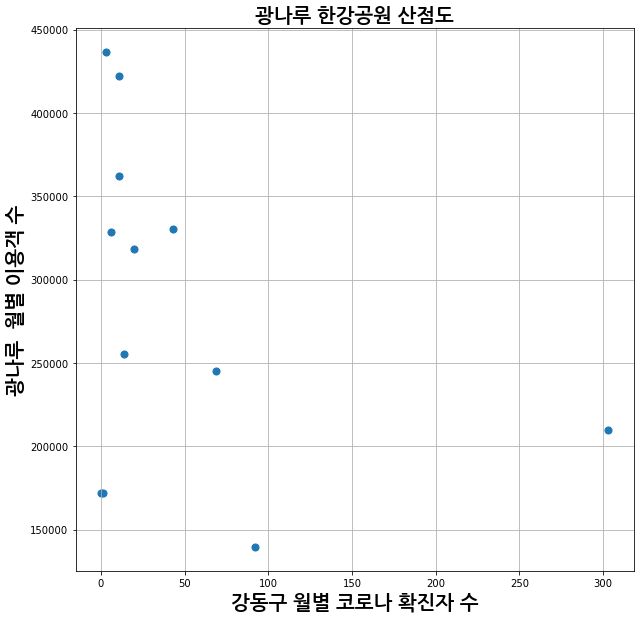

In [68]:
plt.figure(figsize = (10,10))
plt.scatter(M_np['강동구'],M_np['광나루'],s=50)
plt.title('광나루 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('강동구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('광나루  월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

In [ ]:

plt.figure(figsize = (10,10))
plt.scatter(M_np['송파구'],M_np['잠실'],s=50)
plt.title('잠실 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('송파구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠실 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['광진구'],M_np['뚝섬'],s=50)
plt.title('뚝섬 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('광진구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('뚝섬 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['서초구'],M_np['잠원'],s=50)
plt.title('잠원 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠원한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['서초구'],M_np['반포'],s=50)
plt.title('반포 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('반포 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['용산구'],M_np['이촌'],s=50)
plt.title('이촌 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('용산구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('이촌 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['영등포구'],M_np['여의도'],s=50)
plt.title('여의도 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('여의도 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['영등포구'],M_np['양화'],s=50)
plt.title('양화 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('양화 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['마포구'],M_np['망원'],s=50)
plt.title('망원 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('망원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['마포구'],M_np['난지'],s=50)
plt.title('난지 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('난지 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np['강서구'],M_np['강서'],s=50)
plt.title('강서 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('강서구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('강서 한강공워 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

In [ ]:
# 회귀 계수 계산 

np.set_printoptions(suppress =True)

fp1 = np.polyfit(M_np['강동구'],M_np['광나루'], 1)
#회귀선
f1 = np.poly1d(fp1)
fx = np.linspace(0,400,10)

fp2 = np.polyfit(M_np['송파구'],M_np['잠실'], 1)
#회귀선
f2 = np.poly1d(fp2)
fx2 = np.linspace(0,400,10)

fp3 = np.polyfit(M_np['광진구'],M_np['뚝섬'], 1)
#회귀선
f3 = np.poly1d(fp3)
fx3 = np.linspace(0,400,10)

fp4 = np.polyfit(M_np['서초구'],M_np['잠원'], 1)
#회귀선
f4 = np.poly1d(fp4)
fx4 = np.linspace(0,400,10)


fp5 = np.polyfit(M_np['서초구'],M_np['반포'], 1)
#회귀선
f5 = np.poly1d(fp5)
fx5 = np.linspace(0,400,10)

fp6 = np.polyfit(M_np['용산구'],M_np['이촌'], 1)
#회귀선
f6 = np.poly1d(fp6)
fx6 = np.linspace(0,400,10)


fp7 = np.polyfit(M_np['영등포구'],M_np['여의도'], 1)
#회귀선
f7 = np.poly1d(fp7)
fx7 = np.linspace(0,400,10)

fp8 = np.polyfit(M_np['영등포구'],M_np['양화'], 1)
#회귀선
f8 = np.poly1d(fp8)
fx8 = np.linspace(0,400,10)

fp9 = np.polyfit(M_np['마포구'],M_np['망원'], 1)
#회귀선
f9 = np.poly1d(fp9)
fx9 = np.linspace(0,400,10)

fp10 = np.polyfit(M_np['마포구'],M_np['난지'], 1)
#회귀선
f10 = np.poly1d(fp3)
fx10 = np.linspace(0,400,10)


fp11 = np.polyfit(M_np['강서구'],M_np['강서'], 1)
#회귀선
f11 = np.poly1d(fp11)
fx11 = np.linspace(0,800,10)

# 코로나 확진자 수와 이용량 총합계 상관관계

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(M_np['강동구'],M_np['광나루'],s=50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['강동구'][n] *1.02, M_np['광나루'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('광나루 한강공원 산점도', fontproperties= fontprop)
plt.xlabel('강동구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('광나루  월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(M_np['송파구'],M_np['잠실'],s=50)
plt.plot(fx2, f2(fx2), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['송파구'][n] *1.02, M_np['잠실'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('잠실 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('송파구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠실 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['광진구'],M_np['뚝섬'],s=50)
plt.plot(fx3, f3(fx3), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['광진구'][n] *1.02, M_np['뚝섬'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('뚝섬 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('광진구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('뚝섬 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['서초구'],M_np['잠원'],s=50)
plt.plot(fx4, f4(fx4), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['서초구'][n] *1.02, M_np['잠원'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('잠원 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['서초구'],M_np['반포'],s=50)
plt.plot(fx5, f5(fx5), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['서초구'][n] *1.02, M_np['반포'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('반포 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('반포 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['용산구'],M_np['이촌'],s=50)
plt.plot(fx6, f6(fx6), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['용산구'][n] *1.02, M_np['이촌'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('이촌 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('용산구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('이촌 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['영등포구'],M_np['여의도'],s=50)
plt.plot(fx7, f7(fx7), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['영등포구'][n] *1.02, M_np['여의도'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('여의도 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('여의도 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['영등포구'],M_np['양화'],s=50)
plt.plot(fx8, f8(fx8), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['영등포구'][n] *1.02, M_np['양화'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('양화 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('양화 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['마포구'],M_np['망원'],s=50)
plt.plot(fx9, f9(fx9), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['마포구'][n] *1.02, M_np['망원'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('망원 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('망원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['마포구'],M_np['난지'],s=50)
plt.plot(fx10, f10(fx10), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['마포구'][n] *1.02, M_np['난지'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('난지 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('난지 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np['강서구'],M_np['강서'],s=50)
plt.plot(fx11, f11(fx11), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np['강서구'][n] *1.02, M_np['강서'][n] *0.98, M_np.index[n], fontsize =10)
plt.title('강서 한강공원 총 이용량', fontproperties= fontprop)
plt.xlabel('강서구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('강서 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

park.head()

# 코로나 확진자수와 공원 자전거 이용량 상관관계

In [37]:
park2 =  pd.pivot_table(park, index = '기간', columns = '구분', values = '자전거')


In [38]:
park2

구분,강서,광나루,난지,뚝섬,망원,반포,양화,여의도,이촌,잠실,잠원,합계
기간,,,,,,,,,,,,
2020.01,91104,54515,40700,214035,87595,49237,54405,49380,52090,82278,37188,812527
2020.02,71316,56418,34105,188870,32637,50316,49423,35050,44620,77025,38261,678041
2020.03,122764,125639,61116,281185,58415,115613,107576,193300,80810,138617,58168,1343203
2020.04,138800,186505,90455,325090,75708,149865,179322,165900,95410,169500,71915,1648470
2020.05,137488,179964,109895,296390,83762,146104,254592,264000,88832,180345,71777,1813149
2020.06,144824,144445,116906,320265,88891,144818,246109,226550,72090,156275,66526,1727699
2020.07,164209,110635,97415,353808,112907,136131,179936,242700,79175,174465,76310,1727691
2020.08,83804,61995,60805,232520,32060,49980,66123,129277,40857,85090,48716,891227
2020.09,183234,102100,96653,350920,64257,107795,135583,186920,33915,158843,105045,1525265


In [39]:
del park2['합계']

In [40]:
park2

구분,강서,광나루,난지,뚝섬,망원,반포,양화,여의도,이촌,잠실,잠원
기간,,,,,,,,,,,
2020.01,91104,54515,40700,214035,87595,49237,54405,49380,52090,82278,37188
2020.02,71316,56418,34105,188870,32637,50316,49423,35050,44620,77025,38261
2020.03,122764,125639,61116,281185,58415,115613,107576,193300,80810,138617,58168
2020.04,138800,186505,90455,325090,75708,149865,179322,165900,95410,169500,71915
2020.05,137488,179964,109895,296390,83762,146104,254592,264000,88832,180345,71777
2020.06,144824,144445,116906,320265,88891,144818,246109,226550,72090,156275,66526
2020.07,164209,110635,97415,353808,112907,136131,179936,242700,79175,174465,76310
2020.08,83804,61995,60805,232520,32060,49980,66123,129277,40857,85090,48716
2020.09,183234,102100,96653,350920,64257,107795,135583,186920,33915,158843,105045


In [41]:
park2.reset_index(inplace = True)

In [42]:
M_np2=new_covid19.merge(park2, how = 'inner', on = '기간')

In [43]:
M_np2


,기간,강동구,송파구,광진구,서초구,용산구,영등포구,마포구,강서구,강서,광나루,난지,뚝섬,망원,반포,양화,여의도,이촌,잠실,잠원
0,2020.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91104,54515,40700,214035,87595,49237,54405,49380,52090,82278,37188
1,2020.02,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,71316,56418,34105,188870,32637,50316,49423,35050,44620,77025,38261
2,2020.03,6.0,13.0,4.0,20.0,12.0,18.0,14.0,20.0,122764,125639,61116,281185,58415,115613,107576,193300,80810,138617,58168
3,2020.04,3.0,12.0,3.0,14.0,6.0,5.0,9.0,4.0,138800,186505,90455,325090,75708,149865,179322,165900,95410,169500,71915
4,2020.05,11.0,11.0,6.0,4.0,20.0,11.0,3.0,19.0,137488,179964,109895,296390,83762,146104,254592,264000,88832,180345,71777
5,2020.06,11.0,7.0,3.0,14.0,12.0,27.0,11.0,33.0,144824,144445,116906,320265,88891,144818,246109,226550,72090,156275,66526
6,2020.07,14.0,44.0,5.0,7.0,4.0,9.0,14.0,25.0,164209,110635,97415,353808,112907,136131,179936,242700,79175,174465,76310
7,2020.08,92.0,158.0,74.0,75.0,46.0,67.0,77.0,110.0,83804,61995,60805,232520,32060,49980,66123,129277,40857,85090,48716
8,2020.09,43.0,80.0,33.0,57.0,22.0,52.0,32.0,72.0,183234,102100,96653,350920,64257,107795,135583,186920,33915,158843,105045
9,2020.10,20.0,54.0,11.0,34.0,21.0,18.0,26.0,21.0,215980,155400,110690,372928,67283,117160,148600,171267,36657,123913,84474


In [44]:
M_np2=M_np2.set_index('기간')

In [45]:
import numpy as np
print('광나루 한강공원')
print(np.corrcoef(M_np2['강동구'], M_np2['광나루']))
print('잠실 한강공원')
print(np.corrcoef(M_np2['송파구'], M_np2['잠실']))
print('뚝섬 한강공원')
print(np.corrcoef(M_np2['광진구'], M_np2['뚝섬']))
print('잠원 한강공원')
print(np.corrcoef(M_np2['서초구'], M_np2['잠원']))
print('반포 한강공원')
print(np.corrcoef(M_np2['서초구'], M_np2['반포']))
print('이촌 한강공원')
print(np.corrcoef(M_np2['용산구'], M_np2['이촌']))
print('여의도 한강공원')
print(np.corrcoef(M_np2['영등포구'], M_np2['여의도']))
print('양화 한강공원')
print(np.corrcoef(M_np2['영등포구'], M_np2['양화']))
print('망원 한강공원')
print(np.corrcoef(M_np2['마포구'], M_np2['망원']))
print('난지 한강공원')
print(np.corrcoef(M_np2['마포구'], M_np2['난지']))
print('강서 한강공원')
print(np.corrcoef(M_np2['강서구'], M_np2['강서']))

광나루 한강공원
[[ 1.         -0.20858492]
 [-0.20858492  1.        ]]
잠실 한강공원
[[ 1.         -0.51883339]
 [-0.51883339  1.        ]]
뚝섬 한강공원
[[ 1.         -0.07754078]
 [-0.07754078  1.        ]]
잠원 한강공원
[[ 1.         -0.12996699]
 [-0.12996699  1.        ]]
반포 한강공원
[[ 1.         -0.36439629]
 [-0.36439629  1.        ]]
이촌 한강공원
[[ 1.         -0.45389124]
 [-0.45389124  1.        ]]
여의도 한강공원
[[ 1.         -0.31315284]
 [-0.31315284  1.        ]]
양화 한강공원
[[ 1.         -0.33866781]
 [-0.33866781  1.        ]]
망원 한강공원
[[ 1.         -0.48673762]
 [-0.48673762  1.        ]]
난지 한강공원
[[ 1.         -0.29706496]
 [-0.29706496  1.        ]]
강서 한강공원
[[1.         0.04185715]
 [0.04185715 1.        ]]


In [46]:
cor2 = np.array([np.corrcoef(M_np2['강동구'], M_np2['광나루'])[0,1],
                np.corrcoef(M_np2['송파구'], M_np2['잠실'])[0,1],
                np.corrcoef(M_np2['광진구'], M_np2['뚝섬'])[0,1],
                np.corrcoef(M_np2['서초구'], M_np2['잠원'])[0,1],
                np.corrcoef(M_np2['서초구'], M_np2['반포'])[0,1],
                np.corrcoef(M_np2['용산구'], M_np2['이촌'])[0,1],
                np.corrcoef(M_np2['영등포구'], M_np2['여의도'])[0,1],
                np.corrcoef(M_np2['영등포구'], M_np2['양화'])[0,1],
                np.corrcoef(M_np2['마포구'], M_np2['망원'])[0,1],
                np.corrcoef(M_np2['마포구'], M_np2['난지'])[0,1],
                np.corrcoef(M_np2['강서구'], M_np2['강서'])[0,1]])
cor2

array([-0.20858492, -0.51883339, -0.07754078, -0.12996699, -0.36439629,
       -0.45389124, -0.31315284, -0.33866781, -0.48673762, -0.29706496,
        0.04185715])

In [ ]:
np.set_printoptions(suppress =True)

fp1 = np.polyfit(M_np2['강동구'],M_np2['광나루'], 1)
#회귀선
f1 = np.poly1d(fp1)
fx = np.linspace(0,400,10)

fp2 = np.polyfit(M_np2['송파구'],M_np2['잠실'], 1)
#회귀선
f2 = np.poly1d(fp2)
fx2 = np.linspace(0,400,10)

fp3 = np.polyfit(M_np2['광진구'],M_np2['뚝섬'], 1)
#회귀선
f3 = np.poly1d(fp3)
fx3 = np.linspace(0,400,10)

fp4 = np.polyfit(M_np2['서초구'],M_np2['잠원'], 1)
#회귀선
f4 = np.poly1d(fp4)
fx4 = np.linspace(0,400,10)


fp5 = np.polyfit(M_np2['서초구'],M_np2['반포'], 1)
#회귀선
f5 = np.poly1d(fp5)
fx5 = np.linspace(0,400,10)

fp6 = np.polyfit(M_np2['용산구'],M_np2['이촌'], 1)
#회귀선
f6 = np.poly1d(fp6)
fx6 = np.linspace(0,400,10)


fp7 = np.polyfit(M_np2['영등포구'],M_np2['여의도'], 1)
#회귀선
f7 = np.poly1d(fp7)
fx7 = np.linspace(0,400,10)

fp8 = np.polyfit(M_np2['영등포구'],M_np2['양화'], 1)
#회귀선
f8 = np.poly1d(fp8)
fx8 = np.linspace(0,400,10)

fp9 = np.polyfit(M_np2['마포구'],M_np2['망원'], 1)
#회귀선
f9 = np.poly1d(fp9)
fx9 = np.linspace(0,400,10)

fp10 = np.polyfit(M_np2['마포구'],M_np2['난지'], 1)
#회귀선
f10 = np.poly1d(fp10)
fx10 = np.linspace(0,400,10)


fp11 = np.polyfit(M_np2['강서구'],M_np2['강서'], 1)
#회귀선
f11 = np.poly1d(fp11)
fx11 = np.linspace(0,800,10)

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(M_np2['강동구'],M_np2['광나루'],s=50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['강동구'][n] *1.02, M_np2['광나루'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('광나루 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('강동구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('광나루  월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(M_np2['송파구'],M_np2['잠실'],s=50)
plt.plot(fx2, f2(fx2), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['송파구'][n] *1.02, M_np2['잠실'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('잠실 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('송파구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠실 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['광진구'],M_np2['뚝섬'],s=50)
plt.plot(fx3, f3(fx3), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['광진구'][n] *1.02, M_np2['뚝섬'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('뚝섬 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('광진구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('뚝섬 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['서초구'],M_np2['잠원'],s=50)
plt.plot(fx4, f4(fx4), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['서초구'][n] *1.02, M_np2['잠원'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('잠원 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['서초구'],M_np2['반포'],s=50)
plt.plot(fx5, f5(fx5), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['서초구'][n] *1.02, M_np2['반포'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('반포 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('반포 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['용산구'],M_np2['이촌'],s=50)
plt.plot(fx6, f6(fx6), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['용산구'][n] *1.02, M_np2['이촌'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('이촌 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('용산구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('이촌 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['영등포구'],M_np2['여의도'],s=50)
plt.plot(fx7, f7(fx7), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['영등포구'][n] *1.02, M_np2['여의도'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('여의도 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('여의도 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['영등포구'],M_np2['양화'],s=50)
plt.plot(fx8, f8(fx8), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['영등포구'][n] *1.02, M_np2['양화'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('양화 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('양화 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['마포구'],M_np2['망원'],s=50)
plt.plot(fx9, f9(fx9), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['마포구'][n] *1.02, M_np2['망원'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('망원 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('망원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['마포구'],M_np2['난지'],s=50)
plt.plot(fx10, f10(fx10), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['마포구'][n] *1.02, M_np2['난지'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('난지 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('난지 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np2['강서구'],M_np2['강서'],s=50)
plt.plot(fx11, f11(fx11), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np2['강서구'][n] *1.02, M_np2['강서'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('강서 한강공원 자전거 이용량', fontproperties= fontprop)
plt.xlabel('강서구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('강서 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

In [ ]:
import scipy.stats as stats
stats.pearsonr(M_np['강동구'],M_np['광나루'])

In [ ]:
stats.pearsonr(M_np['송파구'],M_np['잠실'])

In [ ]:
import statsmodels.api as sm
results = sm.OLS(M_np['잠실'], sm.add_constant(M_np['송파구'])).fit()

In [ ]:
results.summary()

# 코로나 확진자와 공원 운동시설 이용량 상관관계

In [47]:
park3 =  pd.pivot_table(park, index = '기간', columns = '구분', values = '운동시설')

In [48]:
park3.head(12)

구분,강서,광나루,난지,뚝섬,망원,반포,양화,여의도,이촌,잠실,잠원,합계
기간,,,,,,,,,,,,
2020.01,38508,17597,8895,336575,53578,29235,36995,40661,54035,51492,37715,705286
2020.02,30315,17694,7920,237969,25773,32508,35302,27761,44213,43465,44765,547685
2020.03,44914,32068,13032,282103,41922,61014,34880,25805,71940,66166,68095,741939
2020.04,60314,38466,16117,284981,47462,86155,22623,27730,83340,63915,79315,810418
2020.05,53974,33265,15532,299660,49379,90933,28848,32505,77989,65320,77099,824504
2020.06,57092,24884,14381,313099,59613,75213,28730,28919,66720,78370,58024,805045
2020.07,48350,26980,11500,324538,35549,65235,28878,31209,70557,48291,52434,743521
2020.08,28997,14240,8635,242368,17771,29715,11817,17482,29048,10984,36879,447936
2020.09,61747,36757,11469,341841,41771,62475,24121,46445,22303,3555,91775,744259


In [49]:
park3.reset_index(inplace = True)

In [50]:
M_np3=new_covid19.merge(park3, how = 'inner', on = '기간')

In [51]:
M_np3=M_np3.set_index('기간')

In [52]:
import numpy as np
print('광나루 한강공원')
print(np.corrcoef(M_np3['강동구'], M_np3['광나루']))
print('잠실 한강공원')
print(np.corrcoef(M_np3['송파구'], M_np3['잠실']))
print('뚝섬 한강공원')
print(np.corrcoef(M_np3['광진구'], M_np3['뚝섬']))
print('잠원 한강공원')
print(np.corrcoef(M_np3['서초구'], M_np3['잠원']))
print('반포 한강공원')
print(np.corrcoef(M_np3['서초구'], M_np3['반포']))
print('이촌 한강공원')
print(np.corrcoef(M_np3['용산구'], M_np3['이촌']))
print('여의도 한강공원')
print(np.corrcoef(M_np3['영등포구'], M_np3['여의도']))
print('양화 한강공원')
print(np.corrcoef(M_np3['영등포구'], M_np3['양화']))
print('망원 한강공원')
print(np.corrcoef(M_np3['마포구'], M_np3['망원']))
print('난지 한강공원')
print(np.corrcoef(M_np3['마포구'], M_np3['난지']))
print('강서 한강공원')
print(np.corrcoef(M_np3['강서구'], M_np3['강서']))

광나루 한강공원
[[ 1.         -0.53441352]
 [-0.53441352  1.        ]]
잠실 한강공원
[[ 1.         -0.65523288]
 [-0.65523288  1.        ]]
뚝섬 한강공원
[[ 1.         -0.25700913]
 [-0.25700913  1.        ]]
잠원 한강공원
[[ 1.         -0.13700697]
 [-0.13700697  1.        ]]
반포 한강공원
[[ 1.        -0.3181463]
 [-0.3181463  1.       ]]
이촌 한강공원
[[ 1.         -0.53286491]
 [-0.53286491  1.        ]]
여의도 한강공원
[[1.         0.17182418]
 [0.17182418 1.        ]]
양화 한강공원
[[ 1.         -0.60233815]
 [-0.60233815  1.        ]]
망원 한강공원
[[ 1.         -0.26927737]
 [-0.26927737  1.        ]]
난지 한강공원
[[ 1.         -0.16806463]
 [-0.16806463  1.        ]]
강서 한강공원
[[1.         0.10311246]
 [0.10311246 1.        ]]


In [53]:
cor3 = np.array([np.corrcoef(M_np3['강동구'], M_np3['광나루'])[0,1],
                np.corrcoef(M_np3['송파구'], M_np3['잠실'])[0,1],
                np.corrcoef(M_np3['광진구'], M_np3['뚝섬'])[0,1],
                np.corrcoef(M_np3['서초구'], M_np3['잠원'])[0,1],
                np.corrcoef(M_np3['서초구'], M_np3['반포'])[0,1],
                np.corrcoef(M_np3['용산구'], M_np3['이촌'])[0,1],
                np.corrcoef(M_np3['영등포구'], M_np3['여의도'])[0,1],
                np.corrcoef(M_np3['영등포구'], M_np3['양화'])[0,1],
                np.corrcoef(M_np3['마포구'], M_np3['망원'])[0,1],
                np.corrcoef(M_np3['마포구'], M_np3['난지'])[0,1],
                np.corrcoef(M_np3['강서구'], M_np3['강서'])[0,1]])
cor3

array([-0.53441352, -0.65523288, -0.25700913, -0.13700697, -0.3181463 ,
       -0.53286491,  0.17182418, -0.60233815, -0.26927737, -0.16806463,
        0.10311246])

In [ ]:
M_np3.head()

In [ ]:
np.set_printoptions(suppress =True)

fp1 = np.polyfit(M_np3['강동구'],M_np3['광나루'], 1)
#회귀선
f1 = np.poly1d(fp1)
fx = np.linspace(0,400,10)

fp2 = np.polyfit(M_np3['송파구'],M_np3['잠실'], 1)
#회귀선
f2 = np.poly1d(fp2)
fx2 = np.linspace(0,400,10)

fp3 = np.polyfit(M_np3['광진구'],M_np3['뚝섬'], 1)
#회귀선
f3 = np.poly1d(fp3)
fx3 = np.linspace(0,400,10)

fp4 = np.polyfit(M_np3['서초구'],M_np3['잠원'], 1)
#회귀선
f4 = np.poly1d(fp4)
fx4 = np.linspace(0,400,10)


fp5 = np.polyfit(M_np3['서초구'],M_np3['반포'], 1)
#회귀선
f5 = np.poly1d(fp5)
fx5 = np.linspace(0,400,10)

fp6 = np.polyfit(M_np3['용산구'],M_np3['이촌'], 1)
#회귀선
f6 = np.poly1d(fp6)
fx6 = np.linspace(0,400,10)


fp7 = np.polyfit(M_np3['영등포구'],M_np3['여의도'], 1)
#회귀선
f7 = np.poly1d(fp7)
fx7 = np.linspace(0,400,10)

fp8 = np.polyfit(M_np3['영등포구'],M_np3['양화'], 1)
#회귀선
f8 = np.poly1d(fp8)
fx8 = np.linspace(0,400,10)

fp9 = np.polyfit(M_np3['마포구'],M_np3['망원'], 1)
#회귀선
f9 = np.poly1d(fp9)
fx9 = np.linspace(0,400,10)

fp10 = np.polyfit(M_np3['마포구'],M_np3['난지'], 1)
#회귀선
f10 = np.poly1d(fp10)
fx10 = np.linspace(0,400,10)


fp11 = np.polyfit(M_np3['강서구'],M_np3['강서'], 1)
#회귀선
f11 = np.poly1d(fp11)
fx11 = np.linspace(0,800,10)

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(M_np3['강동구'],M_np3['광나루'],s=50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['강동구'][n] *1.02, M_np3['광나루'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('광나루 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('강동구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('광나루  월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np3['송파구'],M_np3['잠실'],s=50)
plt.plot(fx2, f2(fx2), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['송파구'][n] *1.02, M_np3['잠실'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('잠실 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('송파구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠실 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['광진구'],M_np3['뚝섬'],s=50)
plt.plot(fx3, f3(fx3), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['광진구'][n] *1.02, M_np3['뚝섬'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('뚝섬 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('광진구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('뚝섬 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['서초구'],M_np3['잠원'],s=50)
plt.plot(fx4, f4(fx4), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['서초구'][n] *1.02, M_np3['잠원'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('잠원 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['서초구'],M_np3['반포'],s=50)
plt.plot(fx5, f5(fx5), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['서초구'][n] *1.02, M_np3['반포'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('반포 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('반포 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['용산구'],M_np3['이촌'],s=50)
plt.plot(fx6, f6(fx6), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['용산구'][n] *1.02, M_np3['이촌'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('이촌 한강공원 이용량', fontproperties= fontprop)
plt.xlabel('용산구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('이촌 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['영등포구'],M_np3['여의도'],s=50)
plt.plot(fx7, f7(fx7), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['영등포구'][n] *1.02, M_np3['여의도'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('여의도 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('여의도 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['영등포구'],M_np3['양화'],s=50)
plt.plot(fx8, f8(fx8), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['영등포구'][n] *1.02, M_np3['양화'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('양화 한강공원 운동시설 이용', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('양화 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['마포구'],M_np3['망원'],s=50)
plt.plot(fx9, f9(fx9), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['마포구'][n] *1.02, M_np3['망원'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('망원 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('망원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['마포구'],M_np3['난지'],s=50)
plt.plot(fx10, f10(fx10), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['마포구'][n] *1.02, M_np3['난지'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('난지 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('난지 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np3['강서구'],M_np3['강서'],s=50)
plt.plot(fx11, f11(fx11), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np3['강서구'][n] *1.02, M_np3['강서'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('강서 한강공원 운동시설 이용량', fontproperties= fontprop)
plt.xlabel('강서구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('강서 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

In [ ]:
stats.pearsonr(M_np3['송파구'],M_np3['잠실'])

# 코로나 확진자와 공원 일반 이용자와의 상관관계

In [54]:
park4 =  pd.pivot_table(park, index = '기간', columns = '구분', values = '일반이용자')
del park4['합계']

In [55]:
park4.reset_index(inplace = True)
M_np4=new_covid19.merge(park4, how = 'inner', on = '기간')
M_np4 = M_np4.set_index('기간')

In [56]:
import numpy as np
print('광나루 한강공원')
print(np.corrcoef(M_np4['강동구'], M_np4['광나루']))
print('잠실 한강공원')
print(np.corrcoef(M_np4['송파구'], M_np4['잠실']))
print('뚝섬 한강공원')
print(np.corrcoef(M_np4['광진구'], M_np4['뚝섬']))
print('잠원 한강공원')
print(np.corrcoef(M_np4['서초구'], M_np4['잠원']))
print('반포 한강공원')
print(np.corrcoef(M_np4['서초구'], M_np4['반포']))
print('이촌 한강공원')
print(np.corrcoef(M_np4['용산구'], M_np4['이촌']))
print('여의도 한강공원')
print(np.corrcoef(M_np4['영등포구'], M_np4['여의도']))
print('양화 한강공원')
print(np.corrcoef(M_np4['영등포구'], M_np4['양화']))
print('망원 한강공원')
print(np.corrcoef(M_np4['마포구'], M_np4['망원']))
print('난지 한강공원')
print(np.corrcoef(M_np4['마포구'], M_np4['난지']))
print('강서 한강공원')
print(np.corrcoef(M_np4['강서구'], M_np4['강서']))

광나루 한강공원
[[ 1.         -0.39894734]
 [-0.39894734  1.        ]]
잠실 한강공원
[[ 1.         -0.27673237]
 [-0.27673237  1.        ]]
뚝섬 한강공원
[[ 1.         -0.56670576]
 [-0.56670576  1.        ]]
잠원 한강공원
[[ 1.         -0.27378031]
 [-0.27378031  1.        ]]
반포 한강공원
[[ 1.         -0.52464345]
 [-0.52464345  1.        ]]
이촌 한강공원
[[ 1.         -0.40676622]
 [-0.40676622  1.        ]]
여의도 한강공원
[[ 1.         -0.31395281]
 [-0.31395281  1.        ]]
양화 한강공원
[[ 1.         -0.28883084]
 [-0.28883084  1.        ]]
망원 한강공원
[[ 1.         -0.47910853]
 [-0.47910853  1.        ]]
난지 한강공원
[[ 1.         -0.40301014]
 [-0.40301014  1.        ]]
강서 한강공원
[[1.         0.21820401]
 [0.21820401 1.        ]]


In [57]:
cor4 = np.array([np.corrcoef(M_np4['강동구'], M_np4['광나루'])[0,1],
                np.corrcoef(M_np4['송파구'], M_np4['잠실'])[0,1],
                np.corrcoef(M_np4['광진구'], M_np4['뚝섬'])[0,1],
                np.corrcoef(M_np4['서초구'], M_np4['잠원'])[0,1],
                np.corrcoef(M_np4['서초구'], M_np4['반포'])[0,1],
                np.corrcoef(M_np4['용산구'], M_np4['이촌'])[0,1],
                np.corrcoef(M_np4['영등포구'], M_np4['여의도'])[0,1],
                np.corrcoef(M_np4['영등포구'], M_np4['양화'])[0,1],
                np.corrcoef(M_np4['마포구'], M_np4['망원'])[0,1],
                np.corrcoef(M_np4['마포구'], M_np4['난지'])[0,1],
                np.corrcoef(M_np4['강서구'], M_np4['강서'])[0,1]])
cor4

array([-0.39894734, -0.27673237, -0.56670576, -0.27378031, -0.52464345,
       -0.40676622, -0.31395281, -0.28883084, -0.47910853, -0.40301014,
        0.21820401])

In [ ]:
np.set_printoptions(suppress =True)

fp1 = np.polyfit(M_np4['강동구'],M_np4['광나루'], 1)
#회귀선
f1 = np.poly1d(fp1)
fx = np.linspace(0,400,10)

fp2 = np.polyfit(M_np4['송파구'],M_np4['잠실'], 1)
#회귀선
f2 = np.poly1d(fp2)
fx2 = np.linspace(0,400,10)

fp3 = np.polyfit(M_np4['광진구'],M_np4['뚝섬'], 1)
#회귀선
f3 = np.poly1d(fp3)
fx3 = np.linspace(0,400,10)

fp4 = np.polyfit(M_np4['서초구'],M_np4['잠원'], 1)
#회귀선
f4 = np.poly1d(fp4)
fx4 = np.linspace(0,400,10)


fp5 = np.polyfit(M_np4['서초구'],M_np4['반포'], 1)
#회귀선
f5 = np.poly1d(fp5)
fx5 = np.linspace(0,400,10)

fp6 = np.polyfit(M_np4['용산구'],M_np4['이촌'], 1)
#회귀선
f6 = np.poly1d(fp6)
fx6 = np.linspace(0,400,10)


fp7 = np.polyfit(M_np4['영등포구'],M_np4['여의도'], 1)
#회귀선
f7 = np.poly1d(fp7)
fx7 = np.linspace(0,400,10)

fp8 = np.polyfit(M_np4['영등포구'],M_np4['양화'], 1)
#회귀선
f8 = np.poly1d(fp8)
fx8 = np.linspace(0,400,10)

fp9 = np.polyfit(M_np4['마포구'],M_np4['망원'], 1)
#회귀선
f9 = np.poly1d(fp9)
fx9 = np.linspace(0,400,10)

fp10 = np.polyfit(M_np4['마포구'],M_np4['난지'], 1)
#회귀선
f10 = np.poly1d(fp10)
fx10 = np.linspace(0,400,10)


fp11 = np.polyfit(M_np4['강서구'],M_np4['강서'], 1)
#회귀선
f11 = np.poly1d(fp11)
fx11 = np.linspace(0,800,10)

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(M_np4['강동구'],M_np4['광나루'],s=50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['강동구'][n] *1.02, M_np4['광나루'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('광나루 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('강동구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('광나루  월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()
plt.figure(figsize = (10,10))
plt.scatter(M_np4['송파구'],M_np4['잠실'],s=50)
plt.plot(fx2, f2(fx2), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['송파구'][n] *1.02, M_np4['잠실'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('잠실 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('송파구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠실 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['광진구'],M_np4['뚝섬'],s=50)
plt.plot(fx3, f3(fx3), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['광진구'][n] *1.02, M_np4['뚝섬'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('뚝섬 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('광진구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('뚝섬 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['서초구'],M_np4['잠원'],s=50)
plt.plot(fx4, f4(fx4), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['서초구'][n] *1.02, M_np4['잠원'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('잠원 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('잠원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['서초구'],M_np4['반포'],s=50)
plt.plot(fx5, f5(fx5), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['서초구'][n] *1.02, M_np4['반포'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('반포 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('서초구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('반포 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['용산구'],M_np4['이촌'],s=50)
plt.plot(fx6, f6(fx6), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['용산구'][n] *1.02, M_np4['이촌'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('이촌 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('용산구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('이촌 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['영등포구'],M_np4['여의도'],s=50)
plt.plot(fx7, f7(fx7), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['영등포구'][n] *1.02, M_np4['여의도'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('여의도 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('여의도 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['영등포구'],M_np4['양화'],s=50)
plt.plot(fx8, f8(fx8), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['영등포구'][n] *1.02, M_np4['양화'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('양화 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('영등포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('양화 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['마포구'],M_np4['망원'],s=50)
plt.plot(fx9, f9(fx9), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['마포구'][n] *1.02, M_np4['망원'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('망원 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('망원 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['마포구'],M_np4['난지'],s=50)
plt.plot(fx10, f10(fx10), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['마포구'][n] *1.02, M_np4['난지'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('난지 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('마포구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('난지 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(M_np4['강서구'],M_np4['강서'],s=50)
plt.plot(fx11, f11(fx11), ls = 'dashed', lw = 3, color = 'g')

for n in range(12):
    plt.text(M_np4['강서구'][n] *1.02, M_np4['강서'][n] *0.98, M_np2.index[n], fontsize =10)
plt.title('강서 한강공원 일반 이용량', fontproperties= fontprop)
plt.xlabel('강서구 월별 코로나 확진자 수', fontproperties = fontprop)
plt.ylabel('강서 한강공원 월별 이용객 수', fontproperties = fontprop)
plt.grid()
plt.show()

In [62]:
index1 = ['총이용량','자전거이용량','운동시설이용량','일반 이용량']
columns1 = ['광나루','잠실','뚝섬','잠원','반포','이촌','여의도','양화','망원','난지','강서']
df1 = pd.DataFrame([cor1,cor2, cor3, cor4],index=index1, columns=columns1)
df1= df1.T
df1
df1.reset_index(inplace = True)
df1

,index,총이용량,자전거이용량,운동시설이용량,일반 이용량
0,광나루,-0.348676,-0.208585,-0.534414,-0.398947
1,잠실,-0.549110,-0.518833,-0.655233,-0.276732
2,뚝섬,-0.510587,-0.077541,-0.257009,-0.566706
3,잠원,-0.195139,-0.129967,-0.137007,-0.273780
4,반포,-0.463975,-0.364396,-0.318146,-0.524643
5,이촌,-0.458719,-0.453891,-0.532865,-0.406766
6,여의도,-0.361652,-0.313153,0.171824,-0.313953
7,양화,-0.352271,-0.338668,-0.602338,-0.288831
8,망원,-0.461535,-0.486738,-0.269277,-0.479109
9,난지,-0.337472,-0.297065,-0.168065,-0.403010


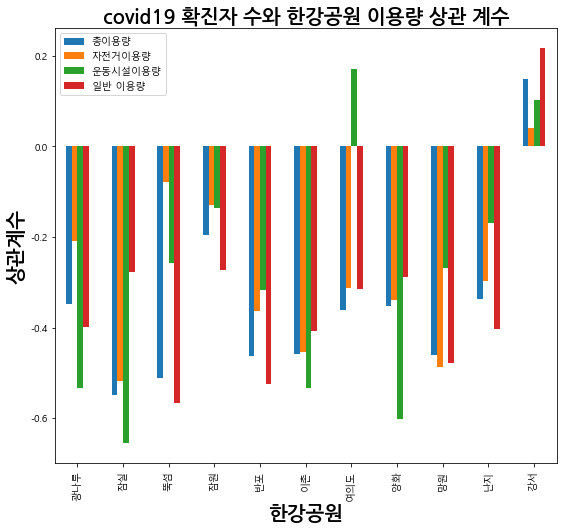

In [74]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
df1.plot(x='index', y=['총이용량','자전거이용량','운동시설이용량','일반 이용량'], kind="bar",figsize=(9,8))
plt.title('covid19 확진자 수와 한강공원 이용량 상관 계수', fontproperties= fontprop)
plt.xlabel('한강공원', fontproperties = fontprop)
plt.ylabel('상관계수', fontproperties = fontprop)
plt.show()